<a href="https://colab.research.google.com/github/Sreeja1585/23CSBTB27-28/blob/main/Classified_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
raw_data = pd.read_csv('Classified_Data.txt')

In [4]:
print(raw_data)

     Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  TARGET

In [5]:
raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

In [6]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [11]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [14]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
model = KNeighborsClassifier(n_neighbors = 1)

In [17]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [18]:
predictions = model.predict(x_test_data)

In [19]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [20]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       147
           1       0.93      0.93      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [21]:
print(confusion_matrix(y_test_data, predictions))

[[136  11]
 [ 10 143]]


In [22]:
error_rates = []

In [23]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

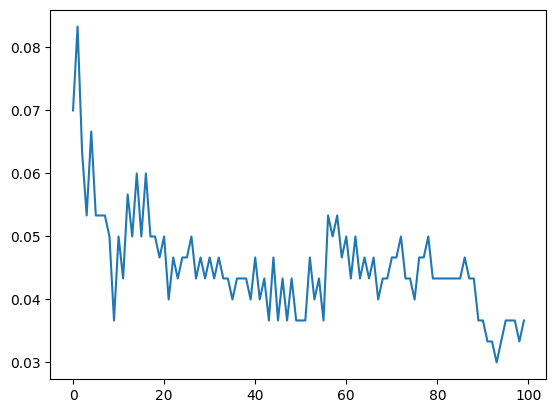

In [24]:
plt.plot(error_rates)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       147
           1       0.90      0.89      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[132  15]
 [ 17 136]]


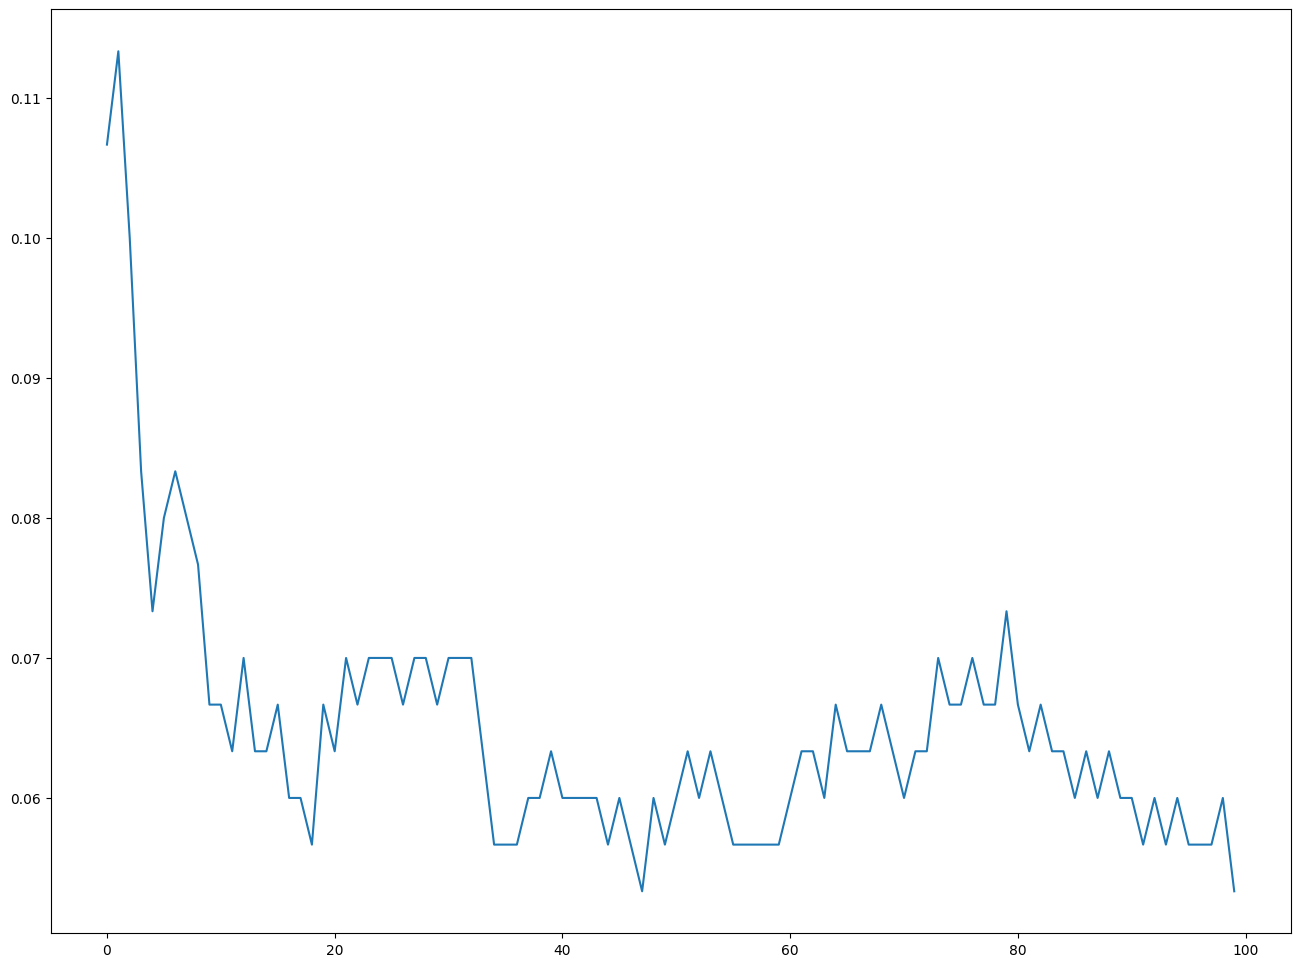

In [26]:
#Common imports

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

#Import the data set

raw_data = pd.read_csv('Classified_Data.txt', index_col = 0)

#Import standardization functions from scikit-learn

from sklearn.preprocessing import StandardScaler

#Standardize the data set

scaler = StandardScaler()

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x = scaled_data

y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

#Performance measurement

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

#Selecting an optimal K value

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

plt.figure(figsize=(16,12))

plt.plot(error_rates)